__The content of this exercise is avalaible on the following url:__

https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392

In [3]:
# import the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# set the graph style and font size

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

__Color Palettes__

In the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial), you can find a list of palettes available. Choose the one you like to start making nice-looking graphs.

In [5]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [6]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [7]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

To adjust the figure size we use <code>plt.figure(figsize)</code>. We’ll also use <code>tight_layout=True</code> to clean up the padding in a plot or between subplots

In [8]:
plt.figure(figsize=(8,4), tight_layout=True)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

# Dataset

In [9]:
df_fifa21 = pd.read_csv('players_20.csv')
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

# Bar Plot

In [11]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

In [12]:
barplot

,nationality,overall
0,Argentina,69.118510
1,Brazil,71.143894
2,Canada,62.855072
3,England,63.253293
4,United States,64.538682


## Bar Plot in MatplotLib with plt.bar()

MatplotLib’s <code>plt.bar()</code> needs two arguments — the name of the categorical variable (nationality) and their lengths (overall ratings).

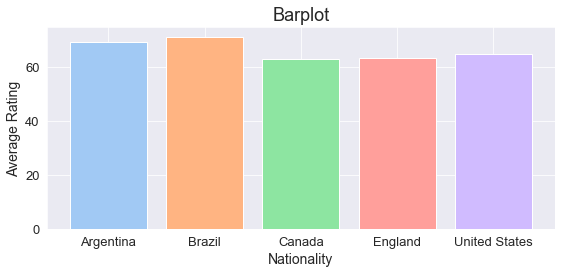

In [13]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

We get the average rating of the top 20 players, the plot would change. Let’s check this with seaborn.

## Bar Plot in Seaborn with sns.barplot()

To get the top 20 players of each country we need to do some preprocessing

In [14]:
# preprocessing
new_df = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20]]
)
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

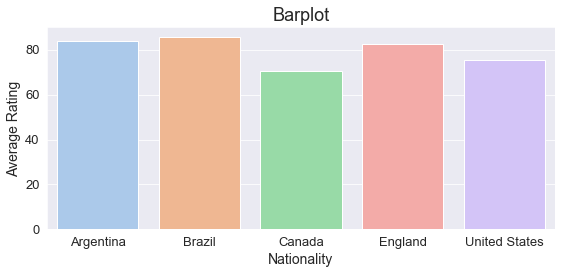

In [15]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.show()

# Barplot grouped by “n” variables

In [16]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

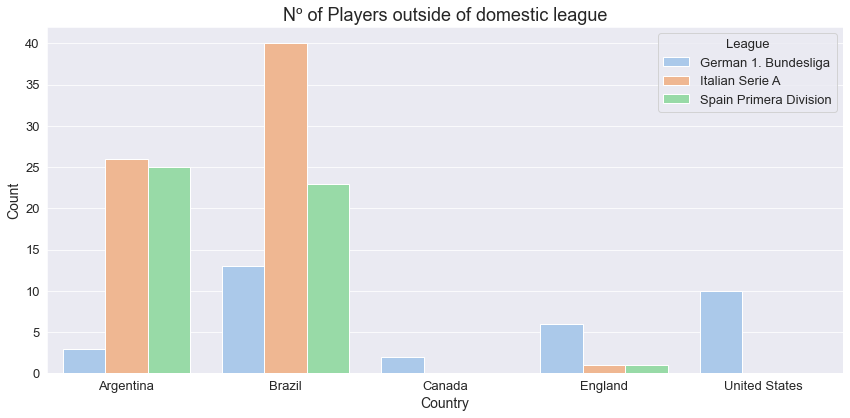

In [19]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')

# We took care of the legend options individually with ax.legend()
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

## Histogram

A histogram represents the distribution of numerical data. Let’s look at the height distribution of football players and analyze its relevance in this sport.

### Histograms with plt.hist() or sns.histplot()

MatplotLib’s <code>plt.hist()</code> and Seaborn’s <code>sns.histplot()</code> work the same. Both need two arguments — the name of the numerical variable (height) and the number or list of bins. In this case, we made a list of bins called bins that will be displayed on the x-axis.

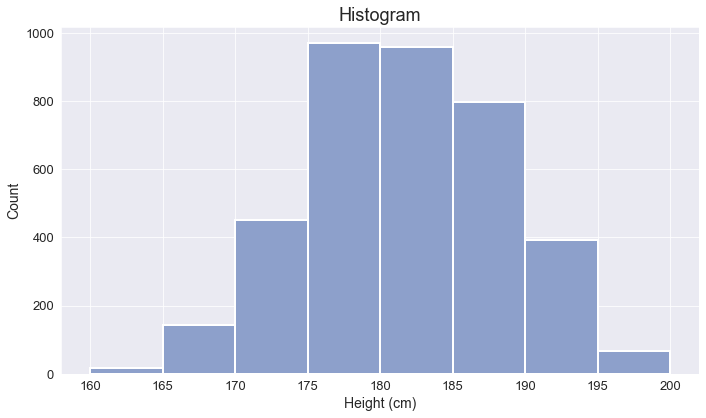

In [20]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
# seaborn
ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')
plt.show()

Let’s check the distribution of height in players from different nations with boxplots.

## Boxplot

Boxplots display the distribution of data based on the minimum value, first quartile (Q1), median, third quartile (Q3), and maximum value. In this case, we’ll make a boxplot showing the height distribution in players from the 5 countries.

Boxplots of multiple categorical variables can be plotted on Matplotlib but it needs some extra preprocessing, so to keep things simple we’ll use Seaborn’s <code>sns.boxplot()</code>. When making boxplots with multiple categorical variables we need two arguments — the name of the categorical variable (nationality) and the name of the numerical variable (height_cm)

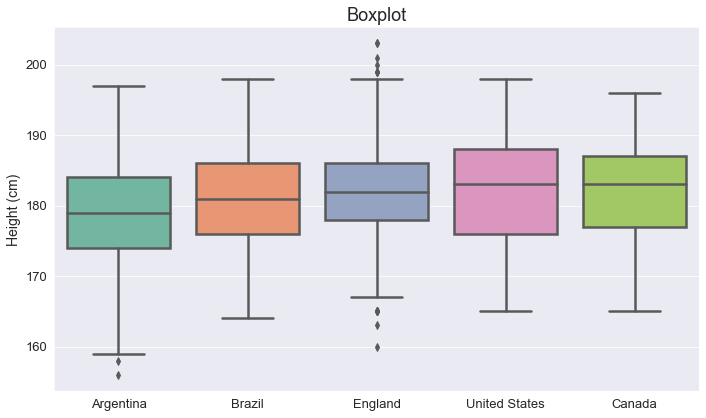

In [21]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

## Scatterplot

A scatter plot displays and shows the relation between two numerical variables in a dataset. In this case, we’ll see the relationship between the height and weight of players.

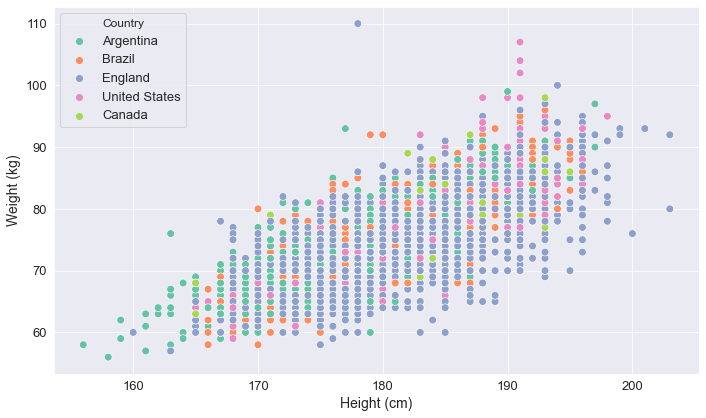

In [22]:
#In this plot, we added the sto control the dot size and also hue to differentiate the nationality

plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

## Piechart + Subplots

We’re going to make a piechart that displays the value of players. In this example, we’ll pick the most valuable player in the USMNT (Pulisic) and see how valuable he is in his club.

In [23]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

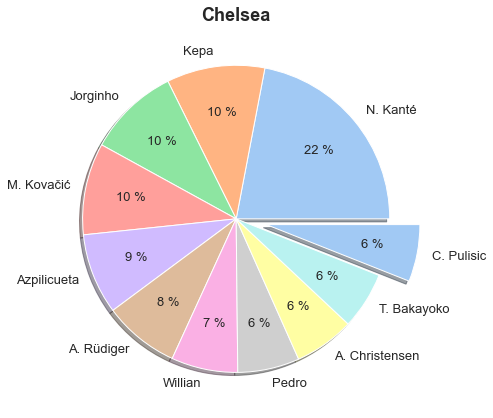

In [24]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()

## Piechart side by side (subplots)

Now let’s plot 2 piecharts side by side to see the impact of this player on his club and national team. To do so, we’ll use <code>plt.subplots(nrows, ncols)</code>. Here the rows and the columns determine the number of plots we’re going to create so <code>nrow=1</code> and <code>ncols=2</code> means 1 plot per column (2 in total).


__Doesn't work, to be checked__

In [33]:
# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

In [36]:
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')

plt.show()

## Line Plot

We’ll plot the ratings of the top football players to see how the rating evolved over the past 5 years. To do so, we have to read the Fifa dataset from 2017 and wrangle the data.

In [38]:
# preprocessing
df_fifa21 = pd.read_csv('players_21.csv')
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa17 = pd.read_csv('players_17.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')

## Line Plot in Matplolib with plt.plot()

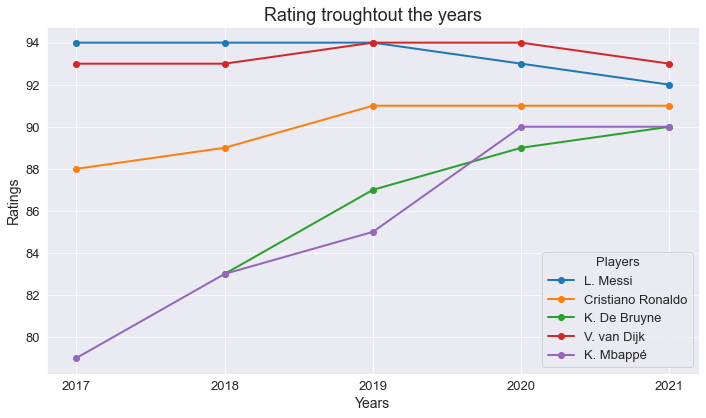

In [39]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.show()

## Line Plot in Seaborn with sns.lineplot()

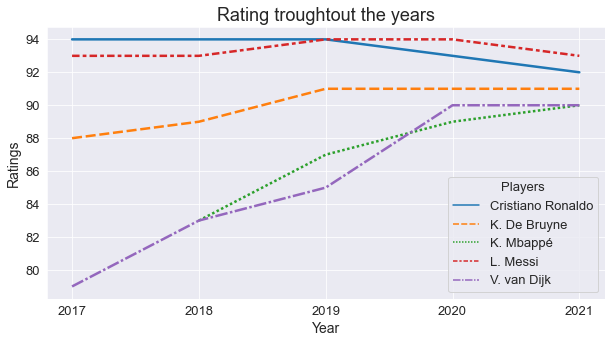

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Year', ylabel='Ratings', title='Rating troughtout the years', xticks=[2017, 2018, 2019, 2020, 2021])
ax.legend(title='Players', title_fontsize = 13)
plt.show()